# Accessing Visual Behavior Ophys Data

## Tutorial overview

This Jupyter notebook covers the various methods for accessing the Allen Institute Visual Behavior Ophys dataset. We will go over how to request data, where it's stored, and what the various files contain. If you're having trouble downloading the data, or you just want to know more about what's going on under the hood, this is a good place to start.

This data release will not have a web interface for browsing through the released data, as with the [two-photon imaging Visual Coding dataset](http://observatory.brain-map.org/visualcoding). Instead, the data must be retrieved through the AllenSDK (Python 3.6+) or via requests sent to the **Amazon Web Services (AWS)** **Simple Storage Service (S3)** bucket (name: [visual-behavior-ophys-data](https://s3.console.aws.amazon.com/s3/buckets/visual-behavior-ophys-data)) for this project.

Functions related to data analysis as well as descriptions of metadata table columns will be covered in other tutorials. For a full list of available tutorials for this project, see the [SDK documentation](https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html).

## Options for data access

The `VisualBehaviorOphysProjectCache` object in the AllenSDK is the easiest way to interact with the released data. This object abstracts away the details of on-disk file storage, and delivers the data to you as ready-to-analyze Python objects. The cache will automatically keep track of which files are stored locally, and will download additional files on an as-needed basis. Usually you won't need to worry about the organization of these files, but this tutorial will cover those details in case you want to analyze them without using the AllenSDK (e.g., in Matlab). This tutorial begins with an introduction to this approach.

Another option is to directly download the data using an S3 URL. This should be used if the other options are broken or are not available to you. Instructions for this can be found <a href='#Direct-download-of-data-from-S3'>at the end of this tutorial</a>.

## Using the AllenSDK to retrieve data

Most users will want to access data via the AllenSDK. This requires nothing more than a Python interpreter and some free disk space to store the data locally.

How much data is there? If you want to download the complete dataset (3021 Behavior Sessions, 551 Behavior Ophys Sessions containing 1165 Behavior Ophys Experiments), you'll need 1000.8 GB of space, split across the following files:

1. CSV files containing information about behavior sessions, behavior ophys sessions, and behavior ophys experiments (1.3 MB)
2. NWB files containing data for behavior sessions (437.6 GB total, min file size = 0.049 GB, max file size = 0.194 GB)
3. NWB files containing data for behavior ophys experiments (563.2 GB total, min file size = 0.231 GB, max file size = 2.96 GB)

Before downloading the data, you must decide on a cache directory where you would like downloaded data to be stored. This directory is where the `VisualBehaviorOphysProjectCache` object will look first when you request a metadata table or a data file.

When you initialize a local cache for the first time, it will create the manifest file at the path that you specify. This file lives one directory up from the rest of the data, so make sure you put it somewhere that has enough space available.

When you need to access the data in subsequent analysis sessions, you should point the `VisualBehaviorOphysProjectCache` object to an existing cache directory; otherwise, it will try to re-download the data in a new location.

To get started with this approach, first take care of the necessary imports:

In [1]:
from pathlib import Path
import matplotlib.pyplot as plt

import allensdk
from allensdk.brain_observatory.behavior.behavior_project_cache import VisualBehaviorOphysProjectCache

# Confirming your allensdk version
print(f"Your allensdk version is: {allensdk.__version__}")

Your allensdk version is: 2.10.2


Next, we'll specify the directory where you'd like downloaded data to be stored (cache_dir). Remember to choose a location that has plenty of free space available.

In [2]:
# Update this to a valid directory in your filesystem
data_storage_directory = Path("/local1/visual_behavior_ophys_cache_dir")

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

ophys_session_table.csv: 100%|██████████| 165k/165k [00:00<00:00, 1.37MMB/s]
behavior_session_table.csv: 100%|██████████| 879k/879k [00:00<00:00, 3.51MMB/s]
ophys_experiment_table.csv: 100%|██████████| 336k/336k [00:00<00:00, 2.71MMB/s]


Instantiating the cache will have it to download 3 project metadata files:

1. `behavior_session_table.csv` (879 kB)
2. `ophys_session_table.csv` (165.1 kB)
3. `ophys_experiment_table.csv` (335.6 kB)

Each one contains a table of information related to its file name. If you're using the AllenSDK, you won't have to worry about how these files are formatted. Instead, you'll load the relevant data using specific accessor method: `get_behavior_session_table()`, `get_ophys_session_table()`, and `get_ophys_experiment_table()`. These functions return a pandas DataFrame containing a row for each item and a column for each metric.

If you are analyzing data without using the AllenSDK, you can load the data using your CSV file reader of choice. However, please be aware the columns in the original file do not necessarily match what's returned by the AllenSDK, which may combine information from multiple files to produce the final DataFrame.

### Using the AllenSDK to access Visual Behavior Ophys metadata

Let's take a closer look at what's in the `behavior_session_table.csv` file:

In [3]:
behavior_sessions = cache.get_behavior_session_table()

print(f"Total number of behavior sessions: {len(behavior_sessions)}")

behavior_sessions.head()

Total number of behavior sessions: 3572


equipment_name  \
behavior_session_id                  
870987812               BEH.D-Box1   
872953842               BEH.D-Box1   
873774125               BEH.D-Box1   
874790261               BEH.D-Box1   
875207834               BEH.D-Box1   

                                                     full_genotype  mouse_id  \
behavior_session_id                                                            
870987812            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
872953842            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
873774125            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
874790261            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
875207834            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   

                                  reporter_line     driver_line sex  \
behavior_session_id                                                   
870987812            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
872953842            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
873774125            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
874790261            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
875207834            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   

                     age_in_days                           session_type  \
behavior_session_id                                                       
870987812                   80.0  TRAINING_0_gratings_autorewards_15min   
872953842                   84.0                    TRAINING_1_gratings   
873774125                   85.0                    TRAINING_1_gratings   
874790261                   86.0                    TRAINING_1_gratings   
875207834                   87.0                    TRAINING_1_gratings   

                         cre_line indicator  session_number  \
behavior_session_id                                           
870987812            Sst-IRES-Cre   GCaMP6f             NaN   
872953842            Sst-IRES-Cre   GCaMP6f             NaN   
873774125            Sst-IRES-Cre   GCaMP6f             NaN   
874790261            Sst-IRES-Cre   GCaMP6f             NaN   
875207834            Sst-IRES-Cre   GCaMP6f             NaN   

                     prior_exposures_to_session_type  \
behavior_session_id                                    
870987812                                          0   
872953842                                          0   
873774125                                          1   
874790261                                          2   
875207834                                          3   

                     prior_exposures_to_image_set  \
behavior_session_id                                 
870987812                                     NaN   
872953842                                     NaN   
873774125                                     NaN   
874790261                                     NaN   
875207834                                     NaN   

                     prior_exposures_to_omissions  ophys_session_id  \
behavior_session_id                                                   
870987812                                       0               NaN   
872953842                                       0               NaN   
873774125                                       0               NaN   
874790261                                       0               NaN   
875207834                                       0               NaN   

                    ophys_experiment_id ophys_container_id project_code  \
behavior_session_id                                                       
870987812                           NaN                NaN          NaN   
872953842                           NaN                NaN          NaN   
873774125                           NaN                NaN          NaN   
874790261                           NaN                NaN          NaN   
875207834    

The `behavior_session_table` DataFrame provides a high-level overview for behavior sessions in the Visual Behavior dataset. The index column (behavior_session_id) is a unique ID, which serves as a key for access behavior data for each session. To get additional information about this data table (and other tables) please visit [this example notebook](https://allensdk.readthedocs.io/en/latest/_static/examples/nb/visual_behavior_ophys_dataset_manifest.html).

Sharp eyed readers may be wondering why the number of behavior session (3572) in this table does not match up with the number of NWB files with behavior session data (3021). This is because the `behavior_session_table` includes entries for behavior sessions that also had optical physiology recordings.

Let's take a look at only the sessions that also included optical physiology data (i.e. the `ophys_session_table.csv`):

In [4]:
behavior_ophys_sessions = cache.get_ophys_session_table()

print(f"Total number of behavior + ophys sessions: {len(behavior_ophys_sessions)}")

behavior_ophys_sessions.head()

Total number of behavior + ophys sessions: 551


equipment_name  \
ophys_session_id                  
951410079                MESO.1   
952430817                MESO.1   
954954402                MESO.1   
955775716                MESO.1   
957020350                MESO.1   

                                                  full_genotype  mouse_id  \
ophys_session_id                                                            
951410079         Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
952430817         Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
954954402         Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
955775716         Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
957020350         Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   

                               reporter_line     driver_line sex  age_in_days  \
ophys_session_id                                                                
951410079         Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F        206.0   
952430817         Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F        209.0   
954954402         Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F        210.0   
955775716         Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F        212.0   
957020350         Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F        213.0   

                              session_type      cre_line indicator  \
ophys_session_id                                                     
951410079                 OPHYS_1_images_A  Sst-IRES-Cre   GCaMP6f   
952430817         OPHYS_2_images_A_passive  Sst-IRES-Cre   GCaMP6f   
954954402                 OPHYS_3_images_A  Sst-IRES-Cre   GCaMP6f   
955775716                 OPHYS_3_images_A  Sst-IRES-Cre   GCaMP6f   
957020350                 OPHYS_4_images_B  Sst-IRES-Cre   GCaMP6f   

                  session_number  prior_exposures_to_session_type  \
ophys_session_id                                                    
951410079                    1.0                                0   
952430817                    2.0                                0   
954954402                    3.0                                0   
955775716                    3.0                                1   
957020350                    4.0                                0   

                  prior_exposures_to_image_set  prior_exposures_to_omissions  \
ophys_session_id                                                               
951410079                                  3.0                             0   
952430817                                  4.0                             1   
954954402                                  5.0                             2   
955775716                                  6.0                             3   
957020350                                  0.0                             4   

                  behavior_session_id  \
ophys_session_id                        
951410079                   951520319   
952430817                   952554548   
954954402                   953982960   
955775716                   956010809   
957020350                   957032492   

                                                ophys_experiment_id  \
ophys_session_id                                                      
951410079         [951980471, 951980473, 951980475, 951980479, 9...   
952430817              [953659743, 953659745, 953659749, 953659752]   
954954402         [958527464, 958527471, 958527474, 958527479, 9...   
955775716                         [956941841, 956941844, 956941846]   
957020350         [957759562, 957759564, 957759566, 957759570, 9...   

                                                 ophys_container_id  \
ophys_session_id                                                      
951410079         [1018028339, 1018028342, 1018028345, 101802835...   
952430817          [1018028339, 1018028345, 1018028354, 1018028357]   
954954402         [1018028339, 1018028342, 1018028345, 10

Here we can see that 3572 - 551 is indeed 3021. The `ophys_session_table` contains information about behavior sessions with optical physiology recordings. Depending on the microscope (`equipment_name`) used, one or multiple ophys_experiments (i.e. imaging planes) may be collected during a behavior ophys session.

In order to keep individual data file sizes reasonable, we are releasing data files organized around ophys_experiments (i.e. imaging planes) instead of at the ophys_session level. The `ophys_session_table` is thus useful for determining which `ophys_experiments` were collected together.

Let's finally take a look at the `ophys_experiment_table.csv`:

In [5]:
behavior_ophys_experiments = cache.get_ophys_experiment_table()

print(f"Total number of behavior ophys experiments: {len(behavior_ophys_experiments)}")

behavior_ophys_experiments.head()

Total number of behavior ophys experiments: 1165


equipment_name  \
ophys_experiment_id                  
951980471                   MESO.1   
951980484                   MESO.1   
951980473                   MESO.1   
951980479                   MESO.1   
951980475                   MESO.1   

                                                     full_genotype  mouse_id  \
ophys_experiment_id                                                            
951980471            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
951980484            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
951980473            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
951980479            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   
951980475            Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt    457841   

                                  reporter_line     driver_line sex  \
ophys_experiment_id                                                   
951980471            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
951980484            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
951980473            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
951980479            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   
951980475            Ai148(TIT2L-GC6f-ICL-tTA2)  [Sst-IRES-Cre]   F   

                     age_in_days      session_type      cre_line indicator  \
ophys_experiment_id                                                          
951980471                  206.0  OPHYS_1_images_A  Sst-IRES-Cre   GCaMP6f   
951980484                  206.0  OPHYS_1_images_A  Sst-IRES-Cre   GCaMP6f   
951980473                  206.0  OPHYS_1_images_A  Sst-IRES-Cre   GCaMP6f   
951980479                  206.0  OPHYS_1_images_A  Sst-IRES-Cre   GCaMP6f   
951980475                  206.0  OPHYS_1_images_A  Sst-IRES-Cre   GCaMP6f   

                     ...  prior_exposures_to_image_set  \
ophys_experiment_id  ...                                 
951980471            ...                           3.0   
951980484            ...                           3.0   
951980473            ...                           3.0   
951980479            ...                           3.0   
951980475            ...                           3.0   

                     prior_exposures_to_omissions  ophys_session_id  \
ophys_experiment_id                                                   
951980471                                       0         951410079   
951980484                                       0         951410079   
951980473                                       0         951410079   
951980479                                       0         951410079   
951980475                                       0         951410079   

                     behavior_session_id  ophys_container_id  \
ophys_experiment_id                                            
951980471                      951520319          1018028342   
951980484                      951520319          1018028351   
951980473                      951520319          1018028345   
951980479                      951520319          1018028354   
951980475                      951520319          1018028339   

                                 project_code  imaging_depth  \
ophys_experiment_id                                            
951980471            VisualBehaviorMultiscope            150   
951980484            VisualBehaviorMultiscope             75   
951980473            VisualBehaviorMultiscope            225   
951980479            VisualBehaviorMultiscope            150   
951980475            VisualBehaviorMultiscope             75   

                    targeted_structure         date_of_acquisition     file_id  
ophys_experiment_id                                                             
951980471                         VISp  2019-09-20 09:45:29.897856  1085394308  
951980484                         VISl  2019-09-20 09:45:29.897856  1085400876  
951980473           

### Using the AllenSDK to access Visual Behavior and Visual Behavior Ophys data

After looking through the metadata for the data release, let's say you want to access information about a specific behavior session (behaviors_session_id=870987812)

To get data for a specific behavior session in the table:

In [6]:
behavior_session = cache.get_behavior_session(behavior_session_id=870987812)

behavior_session_870987812.nwb: 100%|██████████| 51.7M/51.7M [00:03<00:00, 17.1MMB/s]  


In [7]:
# List methods of the session that can be used to get data
print(behavior_session.list_data_attributes_and_methods())

['behavior_session_id', 'cache_clear', 'get_performance_metrics', 'get_reward_rate', 'get_rolling_performance_df', 'licks', 'metadata', 'raw_running_speed', 'rewards', 'running_speed', 'stimulus_presentations', 'stimulus_templates', 'stimulus_timestamps', 'task_parameters', 'trials']


Let's try viewing one of the visual stimuli presented to the mouse during the behavior session we downloaded:

In [8]:
# Listing the different stimuli templates
behavior_session.stimulus_templates

unwarped  \
image_name                                                          
gratings_0.0    [[127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 12...   
gratings_90.0   [[127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 12...   
gratings_180.0  [[127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 12...   
gratings_270.0  [[127.0, 127.0, 127.0, 127.0, 127.0, 127.0, 12...   

                                                           warped  
image_name                                                         
gratings_0.0    [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
gratings_90.0   [[255, 255, 255, 255, 255, 255, 255, 255, 255,...  
gratings_180.0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...  
gratings_270.0  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

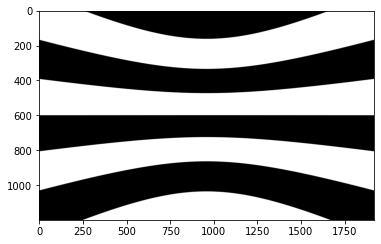

In [9]:
# Visualizing a particular stimulus
plt.imshow(behavior_session.stimulus_templates['warped']['gratings_90.0'], cmap='gray')

As you can see, the `behavior_session` object has a lot of attributes and methods that can be used to access underlying data in the NWB file. Most of these will be touched on in other tutorials for [this data release](https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html).

Now let's see how to get data for a particular ophys experiment (i.e. imaging plane):

In [10]:
ophys_experiment = cache.get_behavior_ophys_experiment(ophys_experiment_id=951980471)

behavior_ophys_experiment_951980471.nwb: 100%|██████████| 264M/264M [00:20<00:00, 13.0MMB/s]   


In [11]:
# List methods of the ophys_experiment object that can be used to get data
print(ophys_experiment.list_data_attributes_and_methods())

['average_projection', 'behavior_session_id', 'cache_clear', 'cell_specimen_table', 'corrected_fluorescence_traces', 'dff_traces', 'events', 'eye_tracking', 'eye_tracking_rig_geometry', 'get_cell_specimen_ids', 'get_cell_specimen_indices', 'get_dff_traces', 'get_performance_metrics', 'get_reward_rate', 'get_rolling_performance_df', 'get_segmentation_mask_image', 'licks', 'max_projection', 'metadata', 'motion_correction', 'ophys_experiment_id', 'ophys_session_id', 'ophys_timestamps', 'raw_running_speed', 'rewards', 'roi_masks', 'running_speed', 'segmentation_mask_image', 'stimulus_presentations', 'stimulus_templates', 'stimulus_timestamps', 'task_parameters', 'trials']


Let's take a quick look at the max projection image for the optical physiology experiment (i.e. imaging plane) we just obtained:

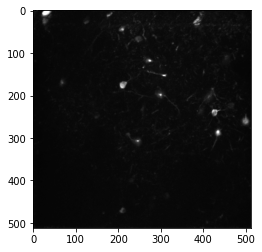

In [12]:
plt.imshow(ophys_experiment.max_projection, cmap='gray')

The `ophys_experiment` object has even more attributes and methods used to access NWB data! As with the `behavior_session` these methods will be touched on in other tutorials for [this data release](https://allensdk.readthedocs.io/en/latest/visual_behavior_optical_physiology.html).

## Downloading the complete dataset with AllenSDK

Analyzing one session or experiment at a time is nice, but in some cases you'll want to be able to perform an analysis across the whole dataset. To fill your cache with all available data, you can use a for loop like the one below.

Before running this code, please make sure that you have enough space available in your cache directory. You'll need around 437.6 GB for the behavior session NWB files, and another 563.2  GB if you're also downloading all ophys experiment NWB files.

In [ ]:
data_storage_directory = Path("/local1/visual_behavior_ophys_cache_dir")  # Update this to a valid directory in your filesystem

cache = VisualBehaviorOphysProjectCache.from_s3_cache(cache_dir=data_storage_directory)

# Remove rows from the behavior sessions table which don't correspond to a behavior session NWB file
filtered_behavior_sessions = behavior_sessions.dropna(subset=["file_id"])
for behavior_session_id, _ in filtered_behavior_sessions.iterrows():
    _ = cache.get_behavior_session(behavior_session_id=behavior_session_id)

for ophys_experiment_id, _ in behavior_ophys_experiments.iterrows():
    _ = cache.get_behavior_ophys_experiment(ophys_experiment_id=ophys_experiment_id)

## Direct download of data from S3

If you do not wish to obtain data via the AllenSDK `VisualBehaviorOphysProjectCache` class, this section describes how to directly determine an S3 download link for your file or files of interest.

The S3 bucket that stores all the data for this project's release is:
<a href='https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/'>https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/</a>

The structure of the S3 bucket looks like:

```
visual-behavior-ophys/
│
├── release_notes.txt
│
├── manifests/
│   ├── visual-behavior-ophys_project_manifest_v{a.b.c}.json
│   ├── visual-behavior-ophys_project_manifest_v{x.y.z}.json
│   ...
│
├── project_metadata/
│   ├── behavior_session_table.csv
│   ├── ophys_experiment_table.csv
│   └── ophys_session_table.csv
│
├── behavior_sessions/
│   ├── behavior_session_{abc}.nwb
│   ├── behavior_session_{xyz}.nwb
│   ...
│
└── behavior_ophys_experiments/
    ├── behavior_ophys_experiment_{abc}.nwb
    ├── behavior_ophys_experiment_{xyz}.nwb
    ...
```

So if for example, you wanted to download a specific `behavior_ophys_experiment` you could first download the `ophys_experiment_table.csv` with:

<a href='https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/project_metadata/ophys_experiment_table.csv'>https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/project_metadata/ophys_experiment_table.csv</a> (try clicking me!)

Then using the table, determine the `ophy_experiment_id` you are interested in. Let's say we want `ophys_experiment_id = 951980471`, then the appropriate download link would be:

<a href='https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/behavior_ophys_experiments/behavior_ophys_experiment_951980471.nwb'>https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/behavior_ophys_experiments/behavior_ophys_experiment_951980471.nwb</a>

Below are some simple sample functions that will help you efficiently determine download URL links:

In [13]:
from urllib.parse import urljoin

def get_manifest_url(manifest_version: str) -> str:
    hostname = "https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/"
    object_key = f"visual-behavior-ophys/manifests/visual-behavior-ophys_project_manifest_v{manifest_version}.json"
    return urljoin(hostname, object_key)

# Example:
print(get_manifest_url("0.1.0"))

https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/manifests/visual-behavior-ophys_project_manifest_v0.1.0.json


In [14]:
def get_metadata_url(metadata_table_name: str) -> str:
    hostname = "https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/"
    object_key = f"visual-behavior-ophys/project_metadata/{metadata_table_name}.csv"
    return urljoin(hostname, object_key)

# Example:
print(get_metadata_url("behavior_session_table"))

https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/project_metadata/behavior_session_table.csv


In [15]:
def get_behavior_session_url(behavior_session_id: int) -> str:
    hostname = "https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/"
    object_key = f"visual-behavior-ophys/behavior_sessions/behavior_session_{behavior_session_id}.nwb"
    return urljoin(hostname, object_key)

# Example:
print(get_behavior_session_url(870987812))

https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/behavior_sessions/behavior_session_870987812.nwb


In [16]:
def get_behavior_ophys_experiment_url(ophys_experiment_id: int) -> str:
    hostname = "https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/"
    object_key = f"visual-behavior-ophys/behavior_ophys_experiments/behavior_ophys_experiment_{ophys_experiment_id}.nwb"
    return urljoin(hostname, object_key)

# Example:
print(get_behavior_ophys_experiment_url(951980471))

https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/behavior_ophys_experiments/behavior_ophys_experiment_951980471.nwb


## Downloading previous versions of released data from S3

AllenSDK makes uses of versioned manifest (JSON) files that live in the S3 bucket to keep track of EVERY version of a file for this data release. If a bug/error in the released data is discovered or new data is added to existing NWB files and the updated NWB file is uploaded in the future, a new manifest will be created pointing to the newest version of the file. The existing manifest will continue pointing at the original version allowing reproducibility of analysis results. You can think of each manifest as a snapshot of the state of the S3 bucket when the manifest was created.

This section describes how to download specific versions of a file in the S3 bucket.

### Listing and downloading a specific manifest version for the data release

If you have an AWS account (even a free tier account works) you can log in and access the bucket directly:

<a href='https://s3.console.aws.amazon.com/s3/buckets/visual-behavior-ophys-data?prefix=visual-behavior-ophys/manifests/'>https://s3.console.aws.amazon.com/s3/buckets/visual-behavior-ophys-data?prefix=visual-behavior-ophys/manifests/</a>

If you don't have or don't want to use an AWS account you can click the following list to get an XML document:

<a href='https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/?list-type=2&prefix=visual-behavior-ophys/manifests/'>https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/?list-type=2&prefix=visual-behavior-ophys/manifests/</a>

Which will look like:
```
<ListBucketResult>
  <Name>visual-behavior-ophys-data</Name>
  <Prefix>visual-behavior-ophys/manifests/</Prefix>
  <KeyCount>1</KeyCount>
  <MaxKeys>1000</MaxKeys>
  <IsTruncated>false</IsTruncated>
  <Contents>
    <Key>
    visual-behavior-ophys/manifests/visual-behavior-ophys_project_manifest_v0.1.0.json
    </Key>
    <LastModified>2021-03-22T14:36:31.000Z</LastModified>
    <ETag>"8d10d6dd87234d4e0a1d400908c5013d"</ETag>
    <Size>1730897</Size>
    <StorageClass>STANDARD</StorageClass>
  </Contents>
</ListBucketResult>
```
The XML document is the result of a query which lists all manifests that currently exist for the data release (denoted with `<Key>` `</Key>`). To obtain a specific manifest of interest you just take the `Key` for the manifest you're interested in and append it to the name of the S3 bucket. For example:

<a href='https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/manifests/visual-behavior-ophys_project_manifest_v0.1.0.json'>https://visual-behavior-ophys-data.s3-us-west-2.amazonaws.com/visual-behavior-ophys/manifests/visual-behavior-ophys_project_manifest_v0.1.0.json</a>


### Using a versioned manifest to download a specific data version

Once you've downloaded a manifest, you can use it to obtain download links for the specific version of data files that the manifest tracks. The example function below loads a downloaded manifest and generates download links for *all* the metadata and data files for the specified manifest:

In [17]:
from typing import List
from urllib.parse import urljoin
import json

# The location will differ based on where you downloaded the manifest.json!
my_manifest_location = Path("/local1/visual_behavior_ophys_cache_dir/visual-behavior-ophys_project_manifest_v0.1.0.json")

def generate_all_download_urls_from_manifest(manifest_path: Path) -> List[str]:
    with manifest_path.open('r') as fp:
        manifest = json.load(fp)
    
    download_links = []
    
    # Get download links for specific version of metadata files
    for metadata_file_entry in manifest["metadata_files"].values():
        base_download_url = metadata_file_entry["url"]
        version_query = f"?versionId={metadata_file_entry['version_id']}"
        full_download_url = urljoin(base_download_url, version_query)
        download_links.append(full_download_url)

    # Get download links for specific version of data files
    for data_file_entry in manifest["data_files"].values():
        base_download_url = data_file_entry["url"]
        version_query = f"?versionId={data_file_entry['version_id']}"
        full_download_url = urljoin(base_download_url, version_query)
        download_links.append(full_download_url)    

    return download_links

# Example:
print('\n'.join(generate_all_download_urls_from_manifest(my_manifest_location)))

https://visual-behavior-ophys-data.s3.us-west-2.amazonaws.com/visual-behavior-ophys/project_metadata/behavior_session_table.csv?versionId=FRY3Rkpnh5TWoBog_0qsNY8K6uJUv2OP
https://visual-behavior-ophys-data.s3.us-west-2.amazonaws.com/visual-behavior-ophys/project_metadata/ophys_session_table.csv?versionId=DaAZdeRE5gAyP0aAoJUQv.PXlLD0zID1
https://visual-behavior-ophys-data.s3.us-west-2.amazonaws.com/visual-behavior-ophys/project_metadata/ophys_experiment_table.csv?versionId=bmF3IkxX69KuNKB1pY3Ty3w_4jRJdagw
https://visual-behavior-ophys-data.s3.us-west-2.amazonaws.com/visual-behavior-ophys/behavior_sessions/behavior_session_870987812.nwb?versionId=kxOnWF1DkGdA.I48mBzn8l3G_jDAmsDb
https://visual-behavior-ophys-data.s3.us-west-2.amazonaws.com/visual-behavior-ophys/behavior_sessions/behavior_session_872953842.nwb?versionId=5GD3RjDZCEgj2kXNkUS6pLpqfV4Ve0N.
https://visual-behavior-ophys-data.s3.us-west-2.amazonaws.com/visual-behavior-ophys/behavior_sessions/behavior_session_873774125.nwb?versi